In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
sales = pd.read_csv("archive/bookstore_chain_AB_calgary_2019_2024_dataset/bookstore_sales.csv")

In [62]:
sales["date"] = pd.to_datetime(sales["date"])

In [63]:
sales_monthly = (
    sales
    .groupby(pd.Grouper(key="date", freq="M"))
    .agg(net_revenue=("net_revenue", "sum"))
    .reset_index()
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_4964\3538324903.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date", freq="M"))


In [64]:
credit = pd.read_csv("archive/bookstore_chain_AB_calgary_2019_2024_dataset/Bookstore Credit Balance Dataset.csv")

In [65]:
credit["date"] = pd.to_datetime(credit["date"])

In [66]:
credit_monthly = (
    credit
    .groupby(pd.Grouper(key="date", freq="M"))
    .agg(
        net_change=("net_change", "sum"),
        balance=("rolling_balance", "last")
    )
    .reset_index()
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_4964\2002439575.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date", freq="M"))


In [67]:
payroll = pd.read_csv("archive/bookstore_chain_AB_calgary_2019_2024_dataset/bookstore_payroll.csv")
payroll.head()

,pay_period_start,employee_id,employee_name,location,role,employment_type,hourly_rate,hours_biweekly,gross_pay,cpp_withheld,ei_withheld,income_tax_withheld,employee_benefits,net_pay,dataset
0,2019-11-11,1001,Harper Brown,YYC-DT,Store Manager,PERM,27.49,80.27,2206.62,114.74,35.31,264.79,44.13,1747.65,bookstore_payroll
1,2019-11-25,1001,Harper Brown,YYC-DT,Store Manager,PERM,27.49,76.56,2104.63,109.44,33.67,252.56,42.09,1666.87,bookstore_payroll
2,2019-12-09,1001,Harper Brown,YYC-DT,Store Manager,PERM,27.49,78.97,2170.89,112.89,34.73,260.51,43.42,1719.34,bookstore_payroll
3,2019-12-23,1001,Harper Brown,YYC-DT,Store Manager,PERM,27.49,72.70,1998.52,103.92,31.98,239.82,39.97,1582.83,bookstore_payroll
4,2020-01-06,1001,Harper Brown,YYC-DT,Store Manager,PERM,27.49,50.45,1386.87,72.12,22.19,166.42,27.74,1098.40,bookstore_payroll


In [68]:
payroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6640 entries, 0 to 6639
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pay_period_start     6640 non-null   object 
 1   employee_id          6640 non-null   int64  
 2   employee_name        6640 non-null   object 
 3   location             6640 non-null   object 
 4   role                 6640 non-null   object 
 5   employment_type      6640 non-null   object 
 6   hourly_rate          6640 non-null   float64
 7   hours_biweekly       6640 non-null   float64
 8   gross_pay            6640 non-null   float64
 9   cpp_withheld         6640 non-null   float64
 10  ei_withheld          6640 non-null   float64
 11  income_tax_withheld  6640 non-null   float64
 12  employee_benefits    6640 non-null   float64
 13  net_pay              6640 non-null   float64
 14  dataset              6640 non-null   object 
dtypes: float64(8), int64(1), object(6)
mem

In [69]:
payroll["date"] = pd.to_datetime(payroll["pay_period_start"])

In [70]:
payroll["labor_cost"] = (
    payroll["gross_pay"]
    + payroll["cpp_withheld"]
    + payroll["ei_withheld"]
    + payroll["employee_benefits"]
)

In [71]:
payroll[["gross_pay", "labor_cost"]].head()

,gross_pay,labor_cost
0,2206.62,2400.80
1,2104.63,2289.83
2,2170.89,2361.93
3,1998.52,2174.39
4,1386.87,1508.92


In [72]:
payroll_monthly = (
    payroll
    .groupby(pd.Grouper(key="date", freq="M"))
    .agg(
        labor_cost=("labor_cost", "sum"),
        employees=("employee_id", "nunique")
    )
    .reset_index()
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_4964\600585954.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="date", freq="M"))


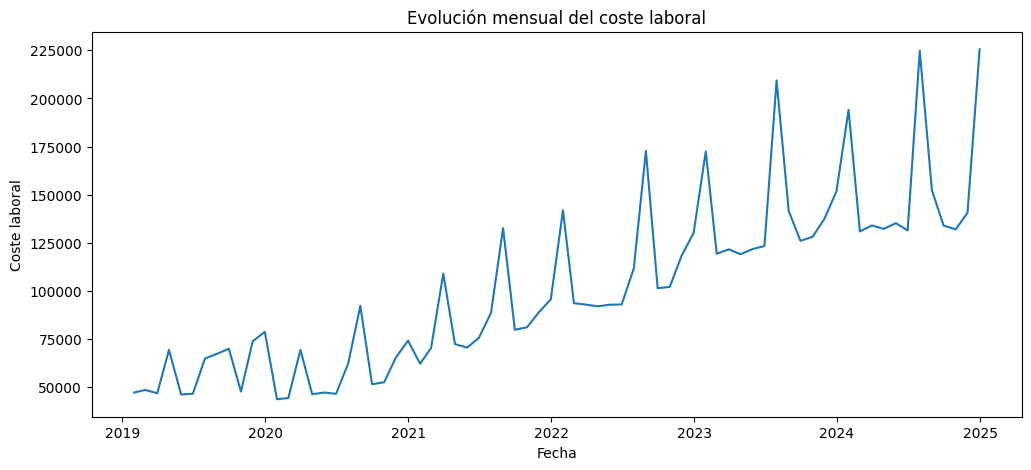

In [73]:
plt.figure(figsize=(12,5))
plt.plot(payroll_monthly["date"], payroll_monthly["labor_cost"])
plt.title("Evolución mensual del coste laboral")
plt.xlabel("Fecha")
plt.ylabel("Coste laboral")
plt.show()

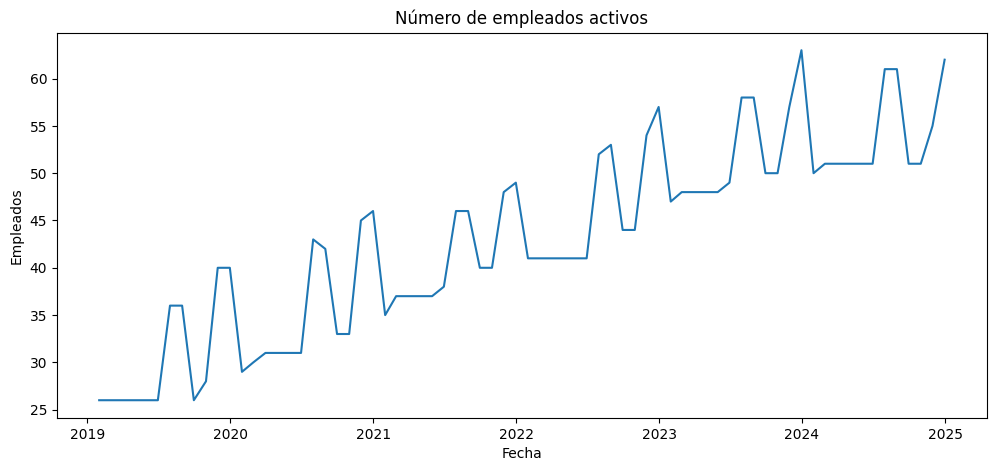

In [74]:
plt.figure(figsize=(12,5))
plt.plot(payroll_monthly["date"], payroll_monthly["employees"])
plt.title("Número de empleados activos")
plt.xlabel("Fecha")
plt.ylabel("Empleados")
plt.show()

El crecimiento de la empresa ha estado acompañado de una expansión de la plantilla que no ha sido compensada proporcionalmente por el aumento de ingresos, lo que ha generado presión sobre la liquidez y el balance de crédito.

In [75]:
pv = pd.merge(
    sales_monthly[["date", "net_revenue"]],
    payroll_monthly[["date", "labor_cost", "employees"]],
    on="date",
    how="inner"
)

In [76]:
pv["payroll_ratio"] = pv["labor_cost"] / pv["net_revenue"]

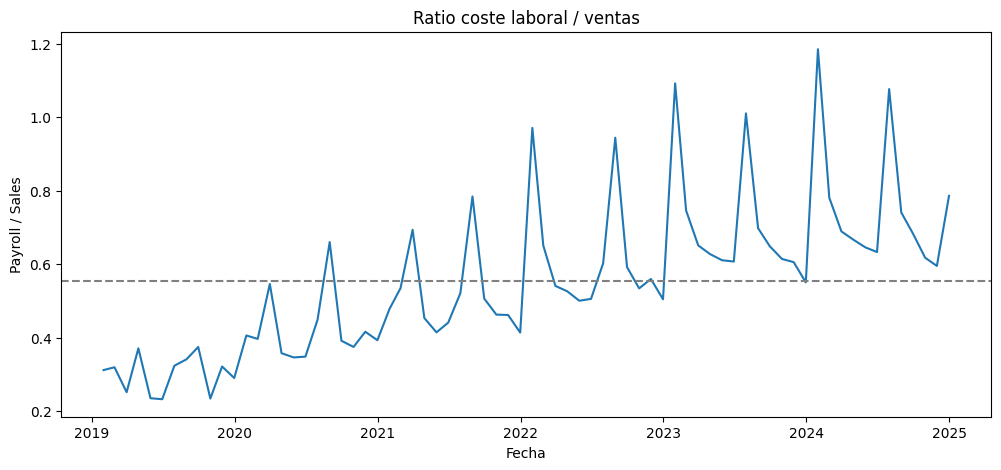

In [77]:
plt.figure(figsize=(12,5))
plt.plot(pv["date"], pv["payroll_ratio"])
plt.axhline(pv["payroll_ratio"].mean(), linestyle="--", color="gray")
plt.title("Ratio coste laboral / ventas")
plt.xlabel("Fecha")
plt.ylabel("Payroll / Sales")
plt.show()

El deterioro del balance de crédito está directamente relacionado con un empeoramiento progresivo de la eficiencia operativa, causado por el crecimiento del coste laboral por encima de los ingresos.

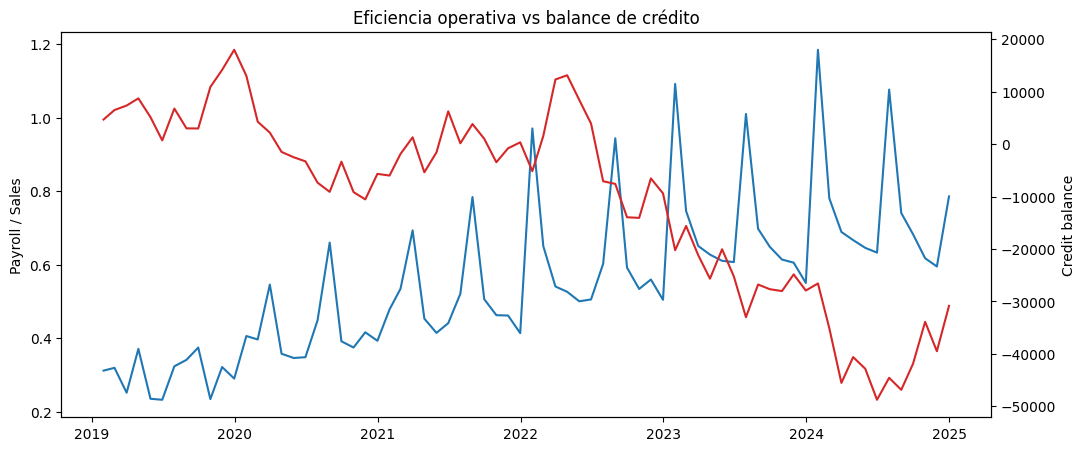

In [78]:
pc = pd.merge(
    pv[["date", "payroll_ratio"]],
    credit_monthly[["date", "balance"]],
    on="date",
    how="inner"
)

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(pc["date"], pc["payroll_ratio"], color="tab:blue")
ax1.set_ylabel("Payroll / Sales")

ax2 = ax1.twinx()
ax2.plot(pc["date"], pc["balance"], color="tab:red")
ax2.set_ylabel("Credit balance")

plt.title("Eficiencia operativa vs balance de crédito")
plt.show()

El análisis del ratio coste laboral/ventas revela un deterioro progresivo de la eficiencia operativa desde 2021, alcanzando valores superiores al 60 % en el periodo 2022–2024. Este incremento coincide temporalmente con el empeoramiento del balance de crédito, lo que sugiere que el crecimiento del negocio no ha sido económicamente sostenible.